In [2]:
from typing import List

from dao.attribute import DAOAttributePL

from ml.model_training import evaluate_models, k_fold_cross_validation
from ml.data_preparation import convert_db_attributes_to_input_data, convert_db_to_attributes_selected_features
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/pawel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/pawel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package pl196x to /home/pawel/nltk_data...
[nltk_data]   Package pl196x is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pawel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/pawel/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [41]:
from models.attribute import AttributePLInDB

dao_attribute_hard_pl: DAOAttributePL = DAOAttributePL(collection_name="attributes-24-12-16")
dao_attribute_manual_pl: DAOAttributePL = DAOAttributePL(collection_name="attributes_manual_test4")

hard_generated: List[AttributePLInDB] = dao_attribute_hard_pl.find_many_by_query({"is_generated": True})
hard_real: List[AttributePLInDB] = dao_attribute_hard_pl.find_many_by_query({"is_generated": False})

manual_generated: List[AttributePLInDB] = dao_attribute_manual_pl.find_many_by_query({"is_generated": True})
manual_real: List[AttributePLInDB] = dao_attribute_manual_pl.find_many_by_query({"is_generated": False})

In [6]:
num_of_features = 245

hard_data = convert_db_attributes_to_input_data(hard_generated, hard_real, num_of_features)

In [11]:
from ml.data_preparation import find_significant_features

significant_features = find_significant_features(hard_data)
print(significant_features)

['number_of_errors', 'stylometrix_metrics.syntactic.SY_S_NOM', 'standard_deviation_sentence_word_length', 'variance_sentence_word_length', 'average_word_char_length', 'variance_sentence_char_length', 'standard_deviation_sentence_char_length', 'text_errors_by_category.TYPOGRAPHY', 'average_sentence_char_length', 'text_errors_by_category.PUNCTUATION', 'average_sentence_word_length', 'stylometrix_metrics.inflection.IN_V_1P', 'punctuation_per_sentence', 'no_space_after_punctuation', 'text_errors_by_category.TYPOS', 'stylometrix_metrics.grammatical_forms.G_NUM', 'stylometrix_metrics.graphical.GR_UPPER', 'punctuation_density', 'stylometrix_metrics.grammatical_forms.G_PRO_REL', 'variance_word_char_length', 'standard_deviation_word_char_length', 'stylometrix_metrics.inflection.IN_V_1S', 'stylometrix_metrics.grammatical_forms.G_ABBR', 'burstiness2', 'stylometrix_metrics.grammatical_forms.G_OTHER', 'stylometrix_metrics.inflection.IN_ADJ_COM', 'stylometrix_metrics.inflection.IN_PRO_1NOM', 'stylom

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from catboost import CatBoostClassifier

In [7]:
def compare_models(dataset):
    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'MLP Classifier': MLPClassifier(),
        #'K-Nearest Neighbors': KNeighborsClassifier(),
        #'Support Vector Classifier': SVC(probability=True),
        #'AdaBoost': AdaBoostClassifier(),
        #'Gaussian Naive Bayes': GaussianNB(),
        #'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
        'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
    }
    for model_name, model in models.items():
        results = k_fold_cross_validation(model, dataset, 10)
        print(model_name)
        print(results)
        #print(f"{model_name} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")
        #print(results)
        #print("\n")


compare_models(hard_data)

Random Forest
{'accuracy': 0.9983175586023885, 'precision': 0.9982887748120725, 'recall': 0.998322489889221, 'f1_score': 0.998303798230664, 'roc_auc': 0.9999413448862879, 'TP': 237.4, 'TN': 237.4, 'FP': 0.4, 'FN': 0.4}
CatBoost
{'accuracy': 0.9983180008845645, 'precision': 0.9974690986862808, 'recall': 0.9991767316585639, 'f1_score': 0.9983184904094659, 'roc_auc': 0.9999697206734128, 'TP': 237.6, 'TN': 237.2, 'FP': 0.6, 'FN': 0.2}


# Manual test of the models

In [8]:
all_error_features=['number_of_errors', 'no_space_after_punctuation', 'double_spaces', 'text_errors_by_category.AMERICAN_ENGLISH_STYLE',
    'text_errors_by_category.BRITISH_ENGLISH',
    'text_errors_by_category.CASING',
    'text_errors_by_category.COLLOCATIONS',
    'text_errors_by_category.COMPOUNDING',
    'text_errors_by_category.CONFUSED_WORDS',
    'text_errors_by_category.GRAMMAR',
    'text_errors_by_category.MISC',
    'text_errors_by_category.MULTITOKEN_SPELLING',
    'text_errors_by_category.NONSTANDARD_PHRASES',
    'text_errors_by_category.NUMBERS',
    'text_errors_by_category.PHONETICS',
    'text_errors_by_category.PRAWDOPODOBNE_LITEROWKI',
    'text_errors_by_category.PUNCTUATION',
    'text_errors_by_category.REDUNDANCY',
    'text_errors_by_category.REPETITIONS_STYLE',
    'text_errors_by_category.SEMANTICS',
    'text_errors_by_category.SPELLING',
    'text_errors_by_category.STYLE',
    'text_errors_by_category.SYNTAX',
    'text_errors_by_category.TYPOGRAPHY',
    'text_errors_by_category.TYPOS',
    'text_errors_by_category.WORD_ORDER']
overfitting_features = ['stylometrix_metrics.syntactic.SY_S_NOM', 'stylometrix_metrics.inflection.IN_V_1P']

In [44]:
num_of_features_manual_test = 10

hard_data_manual_test = convert_db_attributes_to_input_data(hard_generated, hard_real, num_of_features_manual_test)#, exclude_additionally=overfitting_features+all_error_features)

In [45]:
compare_models(hard_data_manual_test)

Random Forest
{'accuracy': 0.995795223352499, 'precision': 0.9953674862690839, 'recall': 0.9962109917733935, 'f1_score': 0.9957848610646656, 'roc_auc': 0.999880935582014, 'TP': 236.9, 'TN': 236.7, 'FP': 1.1, 'FN': 0.9}
CatBoost
{'accuracy': 0.9955846970367095, 'precision': 0.9933092487954347, 'recall': 0.997895232665481, 'f1_score': 0.9955879580327043, 'roc_auc': 0.9998345391707071, 'TP': 237.3, 'TN': 236.2, 'FP': 1.6, 'FN': 0.5}


In [46]:
selected_features = list(hard_data_manual_test[0][0].keys())

In [47]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np

catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
vectorizer = DictVectorizer(sparse=False)
features = vectorizer.fit_transform([features for features, _ in hard_data_manual_test])
labels = np.array([label for _, label in hard_data_manual_test])

catboost_model.fit(features, labels)

In [48]:
manual_data_real = convert_db_to_attributes_selected_features([], manual_real, selected_features)
manual_data_generated = convert_db_to_attributes_selected_features(manual_generated, [], selected_features)
manual_data_both = convert_db_to_attributes_selected_features(manual_generated, manual_real, selected_features)

# manual_predictions_real = catboost_model.predict(vectorizer.transform([features for features, _ in manual_data_real]))
# manual_predictions_generated = catboost_model.predict(vectorizer.transform([features for features, _ in manual_data_generated]))
manual_predictions_both = catboost_model.predict_proba(vectorizer.transform([features for features, _ in manual_data_both]))

In [49]:
manual_predictions_both

array([[0.9980029 , 0.0019971 ],
       [0.99790891, 0.00209109]])

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
len(all_error_features)

26

In [7]:
f1_data={}

In [30]:
for n in [1,2,4,6,8,10,14,20,30,100,244]:
    data = convert_db_attributes_to_input_data(hard_generated, hard_real, n, exclude_additionally=[])
    n = len(data[0][0])
    f1_data[n] = 0
    for i in range(10):
        results = k_fold_cross_validation(CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0), data, 10)
         # print(f"{n} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")
        f1_data[n] += results['f1_score']
    f1_data[n] = f1_data[n]/10

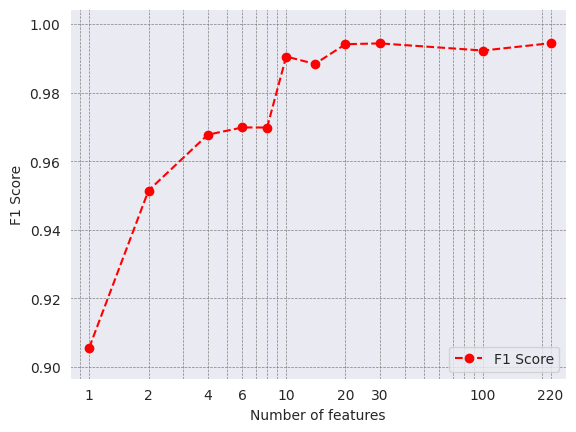

In [31]:
import matplotlib.pyplot as plt


# Extracting data from f1_data
features = sorted(f1_data.keys())  # Sort features to ensure proper plotting
f1_scores = [f1_data[feature] for feature in features]

# Plotting
fig, ax = plt.subplots()

# Set logarithmic scale for x-axis
ax.set_xscale('log')

# Plot F1 scores
ax.plot(features, f1_scores, marker='o', linestyle='--', color='red', label='F1 Score')

# Set labels
ax.set_xlabel('Number of features')
ax.set_ylabel('F1 Score')
ax.set_xlim([0.8, max(features) * 1.2])
ax.set_ylim([min(f1_scores) * 0.99, max(f1_scores) * 1.01])

# ax.set_facecolor('white')  # Replace 'lightgray' with your desired color
# 
# # Set background color for the figure
#fig.patch.set_facecolor('black')

# Set ticks
ax.set_xticks([1, 2, 4, 6, 10, 20, 30, 100, 220])  # Add ticks relevant to your data
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.grid(True, which='both', linestyle='--',color='gray', linewidth=0.5)

# Legend
ax.legend(loc='lower right')

# Save and show plot
#plt.savefig('f1_scores_plot.png')
plt.show()

In [24]:
spelling_related_mistakes = [
    'text_errors_by_category.MULTITOKEN_SPELLING',  # Mistakes involving the incorrect spelling of multi-word phrases.
    'text_errors_by_category.PRAWDOPODOBNE_LITEROWKI',  # Probable typos or misspellings (term in Polish).
    'text_errors_by_category.SPELLING',  # General spelling mistakes.
    'text_errors_by_category.TYPOS'  # Typographical errors, often simple and easy to spot.
]

editing_related_mistakes = [
    'no_space_after_punctuation',  # Missing spaces after punctuation marks like periods, commas, or colons.
    'double_spaces',  # Unintended multiple spaces between words or sentences.
    'text_errors_by_category.AMERICAN_ENGLISH_STYLE',  # Inconsistencies or errors related to American English conventions (e.g., spelling, punctuation, and usage).
    'text_errors_by_category.BRITISH_ENGLISH',  # Inconsistencies or errors related to British English conventions.
    'text_errors_by_category.CASING',  # Incorrect use of uppercase and lowercase letters.
    'text_errors_by_category.COLLOCATIONS',  # Incorrect or awkward combinations of words that are typically used together.
    'text_errors_by_category.COMPOUNDING',  # Errors in forming compound words (e.g., "ice cream" vs. "ice-cream").
    'text_errors_by_category.CONFUSED_WORDS',  # Misuse of words that sound similar or have similar spellings but different meanings (e.g., "affect" vs. "effect").
    'text_errors_by_category.NONSTANDARD_PHRASES',  # Use of phrases that are not standard or widely accepted.
    'text_errors_by_category.PUNCTUATION',  # Incorrect or missing punctuation marks.
    'text_errors_by_category.REDUNDANCY',  # Unnecessary repetition of words or information.
    'text_errors_by_category.REPETITIONS_STYLE',  # Unintentional repetition of words or phrases that affect the style and flow of the text.
    'text_errors_by_category.STYLE',  # Issues related to the overall writing style, including tone, clarity, and consistency.
    'text_errors_by_category.TYPOGRAPHY',  # Errors related to the visual appearance of text, including font, size, spacing, and alignment.
    'text_errors_by_category.WORD_ORDER',  # Incorrect or awkward arrangement of words in a sentence.
    'text_errors_by_category.NUMBERS',  # Errors related to the use of numbers, such as formatting or incorrect numerical expressions.
    'text_errors_by_category.PHONETICS'  # Errors related to the phonetic aspects of words, such as incorrect pronunciation guides.
]

grammar_mistakes = [
    'text_errors_by_category.GRAMMAR',  # Mistakes related to the rules of grammar, such as subject-verb agreement, tense usage, and sentence structure.
    'text_errors_by_category.SYNTAX'  # Errors in the arrangement of words and phrases to create well-formed sentences.
]

other_mistakes = [
    'number_of_errors',  # A general count of errors, not specifying the type.
    'text_errors_by_category.MISC',  # Miscellaneous errors that don't fit into other categories.
    'text_errors_by_category.SEMANTICS'
]



In [25]:
print(f"Spelling related mistakes: {len(spelling_related_mistakes)}")
print(f"Editing related mistakes: {len(editing_related_mistakes)}")
print(f"Grammar mistakes: {len(grammar_mistakes)}")
print(f"Other mistakes: {len(other_mistakes)}")


Spelling related mistakes: 4
Editing related mistakes: 17
Grammar mistakes: 2
Other mistakes: 3


In [32]:
to_exclude = spelling_related_mistakes + other_mistakes
f1_no_mistakes = {}
for n in [1,2,4,6,8,10,14,20,30,100,244]:
    data = convert_db_attributes_to_input_data(hard_generated, hard_real, n, exclude_additionally=all_error_features)
    n = len(data[0][0])
    f1_no_mistakes[n] = 0
    for i in range(10):   
        results = k_fold_cross_validation(CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0), data, 10)
        #print(f"{n} {round(results['accuracy'], 4)} {round(results['roc_auc'], 4)}")
        # print("No mistakes")
        # print(
        #     f"{n} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")
        f1_no_mistakes[n] += results['f1_score']
    f1_no_mistakes[n] = f1_no_mistakes[n]/10

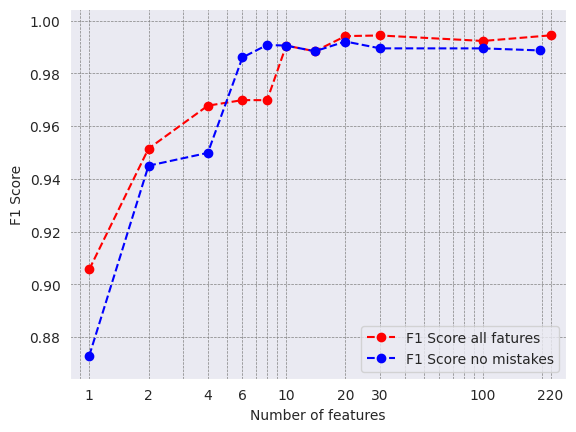

In [33]:
# Extracting data from f1_data
features = sorted(f1_data.keys())  # Sort features to ensure proper plotting
f1_scores = [f1_data[feature] for feature in features]

no_mistake_features = sorted(f1_no_mistakes.keys())  # Sort features to ensure proper plotting
f1_no_mistake_scores = [f1_no_mistakes[feature] for feature in no_mistake_features]

# Plotting
fig, ax = plt.subplots()

# Set logarithmic scale for x-axis
ax.set_xscale('log')

# Plot F1 scores
ax.plot(features, f1_scores, marker='o', linestyle='--', color='red', label='F1 Score all fatures')
ax.plot(no_mistake_features, f1_no_mistake_scores, marker='o', linestyle='--', color='blue', label='F1 Score no mistakes')

# Set labels
ax.set_xlabel('Number of features')
ax.set_ylabel('F1 Score')
ax.set_xlim([0.8, max(features) * 1.2])
ax.set_ylim([min(f1_no_mistake_scores) * 0.99, max(f1_scores) * 1.01])

# ax.set_facecolor('white')  # Replace 'lightgray' with your desired color
# 
# # Set background color for the figure
#fig.patch.set_facecolor('black')

# Set ticks
ax.set_xticks([1, 2, 4, 6, 10, 20, 30, 100, 220])  # Add ticks relevant to your data
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.grid(True, which='both', linestyle='--',color='gray', linewidth=0.5)

# Legend
ax.legend(loc='lower right')

# Save and show plot
#plt.savefig('f1_scores_plot_comparison.png')
plt.show()

In [ ]:
f1_no_spelling = {}
for n in [1,2,4,6,8,10,14,20,30,100,244]:
    data = convert_db_attributes_to_input_data(hard_generated, hard_real, n, exclude_additionally=to_exclude)
    n = len(data[0][0])
    results = k_fold_cross_validation(CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0), data, 10)
    #print(f"{n} {round(results['accuracy'], 4)} {round(results['roc_auc'], 4)}")
    print("No spelling mistakes")
    print(
        f"{n} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")
    f1_no_spelling[n] = results['f1_score']
to_exclude = editing_related_mistakes + other_mistakes
for n in [1,2,4,6,8,10,14,20,30,100,244]:
    data = convert_db_attributes_to_input_data(hard_generated, hard_real, n, exclude_additionally=to_exclude)
    n = len(data[0][0])
    results = k_fold_cross_validation(CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0), data, 10)
    #print(f"{n} {round(results['accuracy'], 4)} {round(results['roc_auc'], 4)}")
    print("No editing mistakes")
    print(
        f"{n} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")
to_exclude = grammar_mistakes + other_mistakes
for n in [1,2,4,6,8,10,14,20,30,100,244]:
    data = convert_db_attributes_to_input_data(hard_generated, hard_real, n, exclude_additionally=to_exclude)
    n = len(data[0][0])
    results = k_fold_cross_validation(CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0), data, 10)
    #print(f"{n} {round(results['accuracy'], 4)} {round(results['roc_auc'], 4)}")
    print("No grammar mistakes")
    print(
        f"{n} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")

In [19]:
generated = pl_generated_personal
real = pl_real_personal

In [20]:
to_exclude = spelling_related_mistakes + other_mistakes
for n in [245]:
    data = convert_db_attributes_to_input_data(generated, real, n, exclude_additionally=all_error_features)
    n = len(data[0][0])
    results = k_fold_cross_validation(RandomForestClassifier(), data, 10)
    #print(f"{n} {round(results['accuracy'], 4)} {round(results['roc_auc'], 4)}")
    print("No mistakes")
    print(
        f"{n} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")
for n in [245]:
    data = convert_db_attributes_to_input_data(generated, real, n, exclude_additionally=to_exclude)
    n = len(data[0][0])
    results = k_fold_cross_validation(RandomForestClassifier(), data, 10)
    #print(f"{n} {round(results['accuracy'], 4)} {round(results['roc_auc'], 4)}")
    print("No spelling mistakes")
    print(
        f"{n} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")
to_exclude = editing_related_mistakes + other_mistakes
for n in [245]:
    data = convert_db_attributes_to_input_data(generated, real, n, exclude_additionally=to_exclude)
    n = len(data[0][0])
    results = k_fold_cross_validation(RandomForestClassifier(), data, 10)
    #print(f"{n} {round(results['accuracy'], 4)} {round(results['roc_auc'], 4)}")
    print("No editing mistakes")
    print(
        f"{n} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")
to_exclude = grammar_mistakes + other_mistakes
for n in [245]:
    data = convert_db_attributes_to_input_data(generated, real, n, exclude_additionally=to_exclude)
    n = len(data[0][0])
    results = k_fold_cross_validation(RandomForestClassifier(), data, 10)
    #print(f"{n} {round(results['accuracy'], 4)} {round(results['roc_auc'], 4)}")
    print("No grammar mistakes")
    print(
        f"{n} & {round(results['accuracy'], 4)} & {round(results['precision'], 4)} & {round(results['recall'], 4)} & {round(results['f1_score'], 4)} & {round(results['roc_auc'], 4)}")

No mistakes
194 & 0.9202 & 0.8935 & 0.9575 & 0.9235 & 0.9747
No spelling mistakes
213 & 0.9389 & 0.9278 & 0.956 & 0.9413 & 0.9857
No editing mistakes
200 & 0.9192 & 0.8942 & 0.9549 & 0.9227 & 0.9773
No grammar mistakes
215 & 0.941 & 0.9355 & 0.9524 & 0.9432 & 0.9876
